## Exploratory analysis 

Summary stats and investigations into training dataset

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Set seed
seed = 1984
np.random.seed(seed)

In [3]:
train = pd.read_csv("Datasets/Combined_News_DJIA_train.csv")
train.shape

(1611, 28)

In [4]:
train['Top1'][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [5]:
# Extract all news headlines into a single doc corpus
doc_list = []
cols = [x for x in train.columns if 'Top' in x]

for c in cols:
    for r in range(train.shape[0]):
        try:
            doc_list.append(CountVectorizer().build_tokenizer()(train[c][r]))
        except:
            # Some dates don't have 25 top stories
            # Identify the missing cells for later use
            print(r, c, train[c][r])
            doc_list.append('')

len(doc_list)

277 Top23 nan
277 Top24 nan
348 Top24 nan
681 Top24 nan
277 Top25 nan
348 Top25 nan
681 Top25 nan


40275

In [6]:
doc_list[0]

['Georgia',
 'downs',
 'two',
 'Russian',
 'warplanes',
 'as',
 'countries',
 'move',
 'to',
 'brink',
 'of',
 'war']

There are a few missing headlines but otherwise we've now gathered a list of all documents
Next step is to process the text with the following steps
- Convert everything to lowercase
- Remove stopwords
- Stem words
- Remove unique words (Those only appearing in one document)

In [7]:
# First correct the nan records in the training data
train.set_value(277, 'Top23', "NA")
train.set_value(277, 'Top24', "NA")
train.set_value(277, 'Top25', "NA")
train.set_value(348, 'Top24', "NA")
train.set_value(348, 'Top25', "NA")
train.set_value(681, 'Top24', "NA")
train.set_value(681, 'Top25', "NA")
train['Top23'][277]

'NA'

In [8]:
# Use CountVectorizer to handle most of these in one step!
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

doc_array = train[[x for x in train.columns if 'Top' in x]].values.flatten()
print(doc_array[0])

# Convert to lowercase, stem and lemmatize
ls = LancasterStemmer
wl = WordNetLemmatizer()
#doc_array = [str(x).lower() for x in doc_array]
doc_array = [" ".join([wl.lemmatize(x.lower()) for x in CountVectorizer().build_tokenizer()(doc)]) for doc in doc_array]

print(doc_array[0])

tdm = vectorizer.fit_transform(doc_array)
tdm.shape

b"Georgia 'downs two Russian warplanes' as countries move to brink of war"
georgia down two russian warplane a country move to brink of war


(40275, 15653)

In [9]:
vocab = vectorizer.get_feature_names()
len(vocab)
vocab[215]

'2016'

In [10]:
col_ind = vocab.index('breaking')
tdm[1,col_ind]

1

In [11]:
tdm_df = pd.DataFrame(data=tdm.todense(), columns=vocab)
tdm_df.shape

(40275, 15653)

In [12]:
tdm_df.iloc[0:5,12000:12005]

,rival,rivalry,river,riverside,riviera
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


Some initial analysis will be performed on the makeup of the headlines:
* What are the most frequently occurring words?
* What are the least frequently occurring words?
* What does the word distribution look like?

In [13]:
# First append the totals to the df
tdm_df.loc['Total']= tdm_df.sum()

# Now sort columns based on total row
sorted_df = tdm_df.sort_values(tdm_df.last_valid_index(), axis=1)

sorted_df.shape

(40276, 15653)

In [14]:
# Lowest count words
sorted_df.loc['Total'][0:10]

pooling       2
supersonic    2
purloined     2
goodyear      2
goodness      2
goodall       2
purple        2
chem          2
gooch         2
gonna         2
Name: Total, dtype: int64

In [15]:
# Highest count words
sorted_df.loc['Total'][-10:]

police        1666
china         1801
government    1849
new           1871
world         1951
israel        1984
wa            2160
year          2436
say           2500
ha            3728
Name: Total, dtype: int64

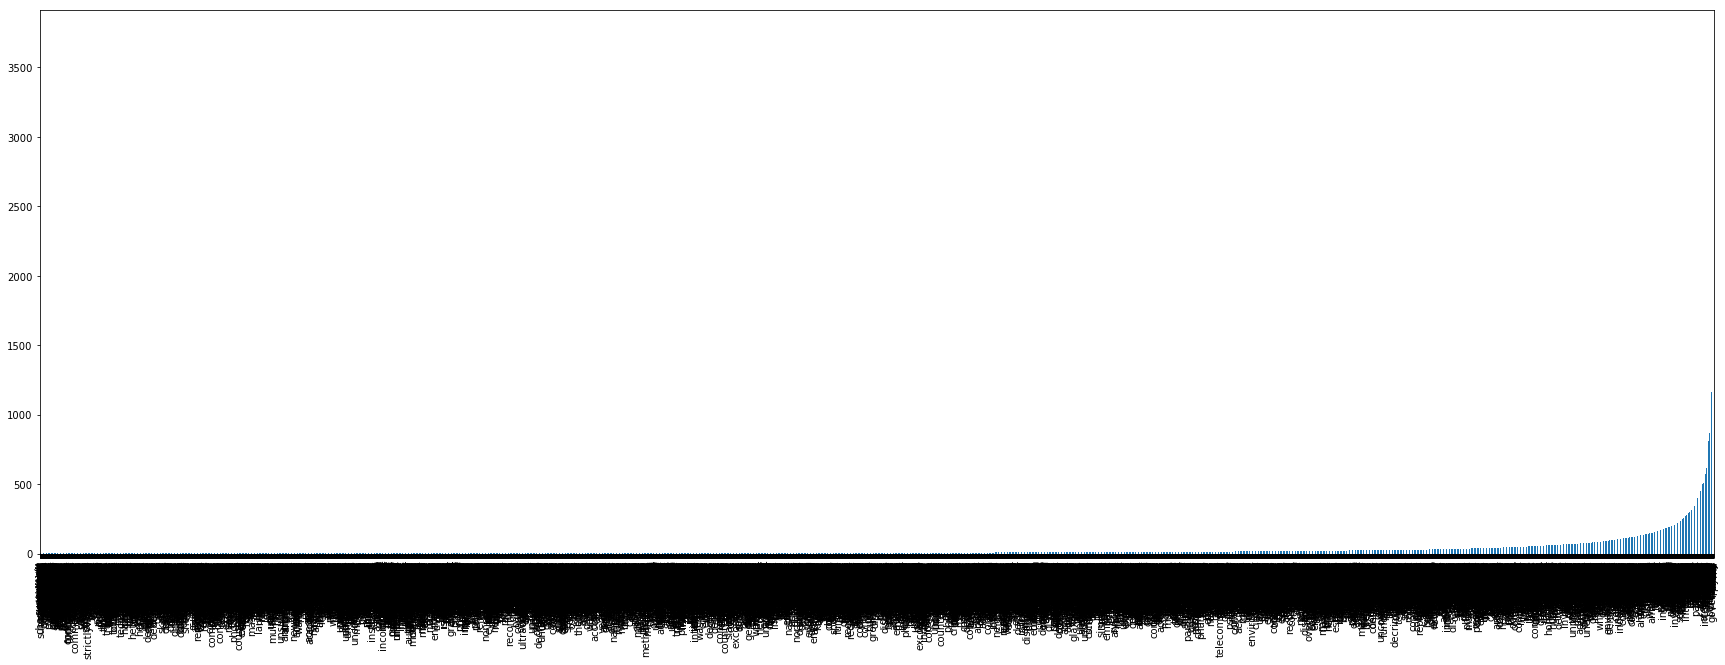

In [16]:
# Plot histogram of word totals
sorted_df.loc['Total'].plot(kind='bar', figsize=[30,10])

In [17]:
# Cleanup extraneous data
del sorted_df
del tdm_df
del tdm
del doc_array
del vocab
del doc_list